In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skimage
import numpy as np
from PIL import Image 
from skimage import io

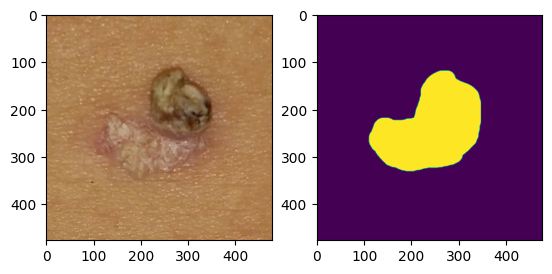

In [13]:
rgb_img = plt.imread("pictures\PAT_414_822_420.png")[:,:,:3]
mask = plt.imread("groupR_masks\PAT_414_822_420_mask.png")
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[1].imshow(mask)


In [14]:
rgb_img = plt.imread("mdasm-2024\pictures\PAT_471_909_344.png")[:,:,:3]
mask = plt.imread("mdasm-2024\groupR_masks\PAT_471_909_344_mask.png")
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[1].imshow(mask)



FileNotFoundError: [Errno 2] No such file or directory: 'mdasm-2024\\pictures\\PAT_471_909_344.png'

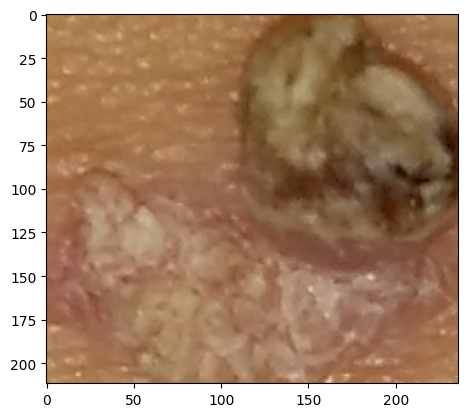

In [15]:
lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x,min_y:max_y]
cropped_lesion_mask=mask[min_x:max_x,min_y:max_y]
image_shape=cropped_lesion.shape[:2]
plt.imshow(cropped_lesion)


In [16]:
reshape=cropped_lesion.reshape(-1,3)
reshape.shape

(50032, 3)

In [32]:
k_clust=KMeans(n_clusters=2)
k_clust.fit(reshape)
segmentation_labels=k_clust.labels_

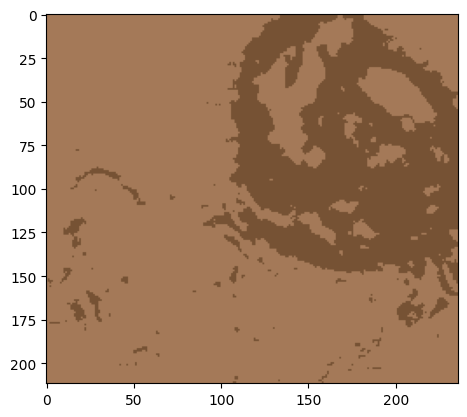

In [33]:
seg_img=k_clust.cluster_centers_[segmentation_labels]
my_result=seg_img.reshape(cropped_lesion.shape)
#plt.imshow(my_result)
plt.imshow(my_result)

In [40]:
centroids = k_clust.cluster_centers_
#print(centroids[0])
for i in centroids:
    print(i*255)

[118.367645  82.12678   52.055126]
[164.2327   121.99141   88.167656]


In [41]:
def is_darker(color1, color2):
    # Convert colors to grayscale
    gray1 = 0.299 * color1[0] + 0.587 * color1[1] + 0.114 * color1[2]
    gray2 = 0.299 * color2[0] + 0.587 * color2[1] + 0.114 * color2[2]
    
    # Compare grayscale values
    return gray1 < gray2

if is_darker(tuple(centroids[0]), tuple(centroids[1])):
    print("Color 1 is darker.", tuple(centroids[0]*255))
else:
    print("Color 2 is darker.",tuple(centroids[1]*255))

Color 1 is darker. (118.367645, 82.12678, 52.055126)


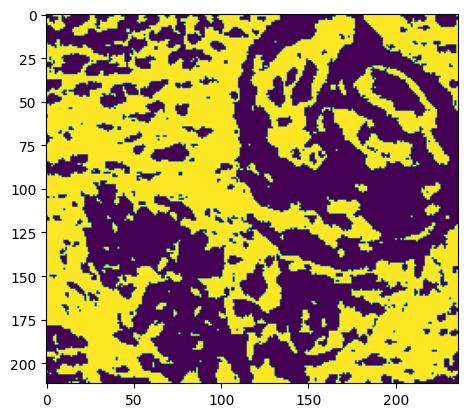

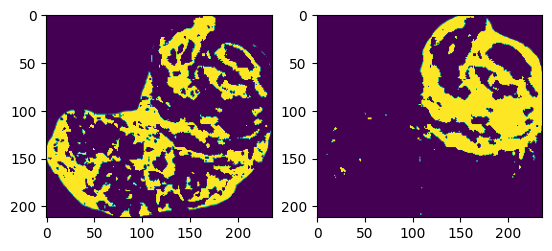

In [19]:
label_image = segmentation_labels.reshape(cropped_lesion_mask.shape[:2])
plt.imshow(label_image==0)
cluster_image_1 = np.zeros_like(cropped_lesion_mask)
cluster_image_2 = np.zeros_like(cropped_lesion_mask)
#cl1= cropped_lesion[label_image==0]
cluster_image_1[label_image == 0] = cropped_lesion_mask[label_image == 0]
cluster_image_2[label_image == 1] = cropped_lesion_mask[label_image == 1]
#cl2 = cropped_lesion[label_image == 1]

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cluster_image_1)
axarr[1].imshow(cluster_image_2)


9707.777
11575.0


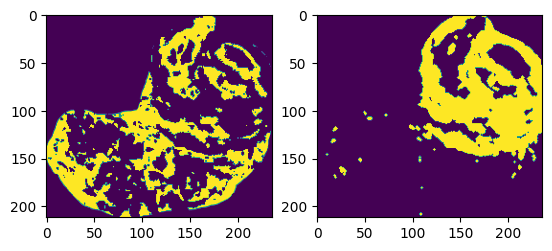

In [23]:
from skimage import morphology


# Use this "brush" to erode the image - eat away at the borders
cl1_dilated=np.zeros_like(cropped_lesion_mask)
dilate = morphology.binary_dilation(cluster_image_2, out=cl1_dilated, mode='min')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cluster_image_1)
axarr[1].imshow(cl1_dilated)

print(np.sum(cluster_image_2))
print(np.sum(cl1_dilated))

In [25]:
overlapping_area = np.sum(cropped_lesion_mask * cluster_image_2)
nonoverlapping_area = np.sum(cropped_lesion_mask)-np.sum(cluster_image_2)
score =  overlapping_area/nonoverlapping_area
print(score)

0.43204814


Color 2 is darker. (103.990715, 75.35265, 75.758575)
Score: 0.33658978 65308.06 194028.64


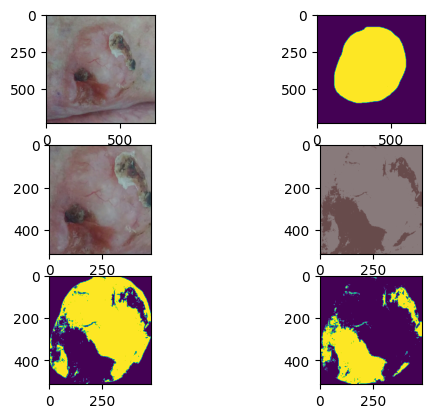

In [49]:
rgb_img = plt.imread("pictures\PAT_460_894_429.png")[:,:,:3]
mask = plt.imread("groupR_masks\PAT_460_894_429_mask.png")
f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(rgb_img)
axarr[0,1].imshow(mask)

def is_darker(color1, color2):
    # Convert colors to grayscale
    gray1 = 0.299 * color1[0] + 0.587 * color1[1] + 0.114 * color1[2]
    gray2 = 0.299 * color2[0] + 0.587 * color2[1] + 0.114 * color2[2]
    
    # Compare grayscale values
    return gray1 < gray2


lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x,min_y:max_y]
cropped_lesion_mask=mask[min_x:max_x,min_y:max_y]
image_shape=cropped_lesion.shape[:2]
axarr[1,0].imshow(cropped_lesion)

reshape=cropped_lesion.reshape(-1,3)
reshape.shape

k_clust=KMeans(n_clusters=2)
k_clust.fit(reshape)
segmentation_labels=k_clust.labels_
centroids = k_clust.cluster_centers_

seg_img=k_clust.cluster_centers_[segmentation_labels]
my_result=seg_img.reshape(cropped_lesion.shape)
#plt.imshow(my_result)
axarr[1,1].imshow(my_result)

label_image = segmentation_labels.reshape(cropped_lesion_mask.shape[:2])
plt.imshow(label_image==0)
cluster_image_1 = np.zeros_like(cropped_lesion_mask)
cluster_image_2 = np.zeros_like(cropped_lesion_mask)
#cl1= cropped_lesion[label_image==0]
cluster_image_1[label_image == 0] = cropped_lesion_mask[label_image == 0]
cluster_image_2[label_image == 1] = cropped_lesion_mask[label_image == 1]
#cl2 = cropped_lesion[label_image == 1]


axarr[2,0].imshow(cluster_image_1)
axarr[2,1].imshow(cluster_image_2)

area_cl1=np.sum(cluster_image_1)
area_cl2=np.sum(cluster_image_2)
    
    
if is_darker(tuple(centroids[0]), tuple(centroids[1])):
    print("Color 1 is darker.", tuple(centroids[0]*255))    
    major_cl=cluster_image_1
    overlapping_area = np.sum(cropped_lesion_mask * major_cl)

else:
    print("Color 2 is darker.",tuple(centroids[1]*255))
    major_cl=cluster_image_2
    overlapping_area = np.sum(cropped_lesion_mask * major_cl)

score =  overlapping_area/ np.sum(cropped_lesion_mask)
print('Score:',score, overlapping_area, np.sum(cropped_lesion_mask))